In [1]:
#importing necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input


C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load your datasets
train_data = pd.read_csv('datasets/train/train_emoticon.csv')  # Training dataset
val_data = pd.read_csv('datasets/valid/valid_emoticon.csv')  # Validation dataset
test_data = pd.read_csv('datasets/test/test_emoticon.csv')  # Test dataset

In [3]:
train_data.head()

,input_emoticon,label
0,😛🛐😻😑😣🙠🙯🚼😒🙼😑🙯😣,0
1,🛐😑😪😛🚼🙯😣🚅😑🙯😹😣🙼,0
2,😛🙯😑🚡😣🚼🛐🙲😣🙯🛑😑🙼,0
3,😛🚼🛐🙐😣🙯😑🙪😑🙼🛆😣🙯,1
4,🛐🚟🚼😛🙋😑😣🙯😹🙯😑😣🙼,1


In [4]:
val_data.head()

,input_emoticon,label
0,🚼😛😔😑😣🚚🙯🛐🙼😑😣🙯🚍,1
1,🛐😣🙗😛🙸🙯😑🚼😑🙯😣🙼😉,1
2,🚼🛐🚩😛🙯🚄😣😑😸🙯😑🙼😣,0
3,😛😡😑🙻😣🙯🚼🛐😣😒🙯🙼😑,0
4,🙨😑😳😛😣🛐🚼🙯😚😣🙼😑🙯,1


In [5]:
test_data.head()

,input_emoticon
0,🛐😣😑🙯🚼🛗🛚😛🙼🙯🙍😑😣
1,😣🙵🛐😞😛🙯🚼😑🙼😣🙨😑🙯
2,🛜🙯😛🚼😣🙵😑🛐🙯😑🙭🙼😣
3,😪😣😑😛🙯🛐🚔🚼🙯😑🛠🙼😣
4,🚳🛐🙝😛😑🙯😣🚼🙯🙍😣🙼😑


In [6]:
#preparing datasets
train_emoticons = train_data['input_emoticon'].values
train_labels = train_data['label'].values
val_emoticons = val_data['input_emoticon'].values
val_labels = val_data['label'].values

In [7]:
# Tokenize and pad sequences for data preprocessing
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(train_emoticons)

train_sequences = tokenizer.texts_to_sequences(train_emoticons)
val_sequences = tokenizer.texts_to_sequences(val_emoticons)

max_length = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in val_sequences))
train_padded_sequences = pad_sequences(train_sequences, maxlen=max_length, padding='post')
val_padded_sequences = pad_sequences(val_sequences, maxlen=max_length, padding='post')

In [8]:
train_padded_sequences

array([[  4,   5,  32, ...,   1,   3,   2],
       [  5,   1,  33, ...,  67,   2,   7],
       [  4,   3,   1, ...,  34,   1,   7],
       ...,
       [172,   1,  37, ...,   3,   2,   1],
       [  2,   1,   4, ...,  21,   2,   7],
       [  4,   2,   6, ...,  93,   3,   7]])

In [9]:
val_padded_sequences

array([[  6,   4,  44, ...,   2,   3,  75],
       [  5,   2, 214, ...,   2,   7,  38],
       [  6,   5, 182, ...,   1,   7,   2],
       ...,
       [  2,  99,   3, ...,  83,   1,   3],
       [  5,   2, 128, ...,   1,   3,  65],
       [  6, 136,   4, ...,   7,   2,   3]])

In [13]:
#Feature Extraction using LSTM model
embedding_dim = 8
lstm_units = 32

# LSTM model architecture for binary classification
input_layer = Input(shape=(max_length,))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim)(input_layer)
lstm_layer = LSTM(lstm_units, return_sequences=False)(embedding_layer)
dense_layer = Dense(16, activation='relu')(lstm_layer)
output_layer = Dense(1, activation='sigmoid')(dense_layer)  # Change to 1 output with sigmoid activation
model = Model(inputs=input_layer, outputs=output_layer)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Validation Accuracy with 20% training data: 0.88
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       252
           1       0.86      0.90      0.88       237

    accuracy                           0.88       489
   macro avg       0.88      0.88      0.88       489
weighted avg       0.88      0.88      0.88       489



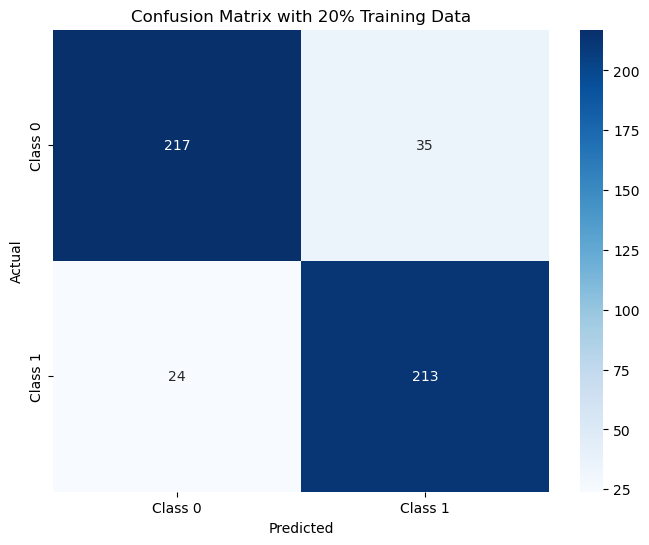

89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Validation Accuracy with 40% training data: 0.90
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       252
           1       0.88      0.92      0.90       237

    accuracy                           0.90       489
   macro avg       0.90      0.90      0.90       489
weighted avg       0.90      0.90      0.90       489



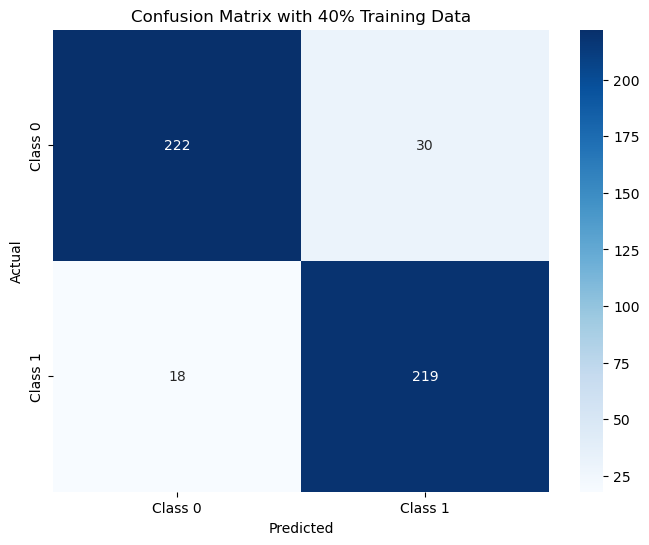

133/133 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Validation Accuracy with 60% training data: 0.92
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       252
           1       0.93      0.92      0.92       237

    accuracy                           0.92       489
   macro avg       0.92      0.92      0.92       489
weighted avg       0.92      0.92      0.92       489



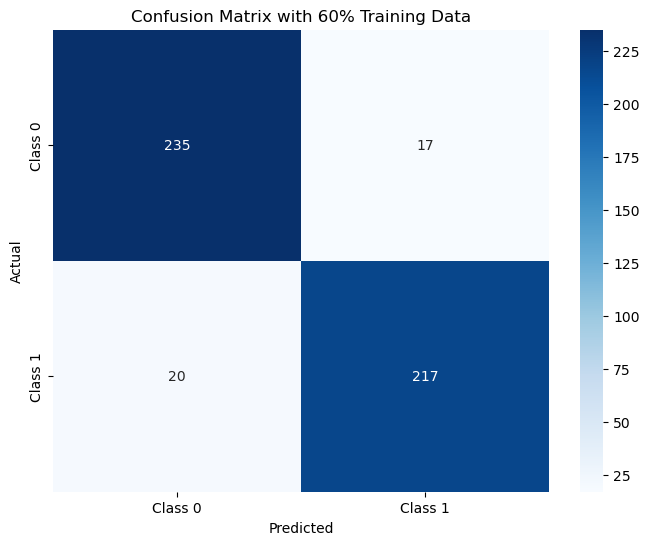

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Validation Accuracy with 80% training data: 0.95
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       252
           1       0.95      0.95      0.95       237

    accuracy                           0.95       489
   macro avg       0.95      0.95      0.95       489
weighted avg       0.95      0.95      0.95       489



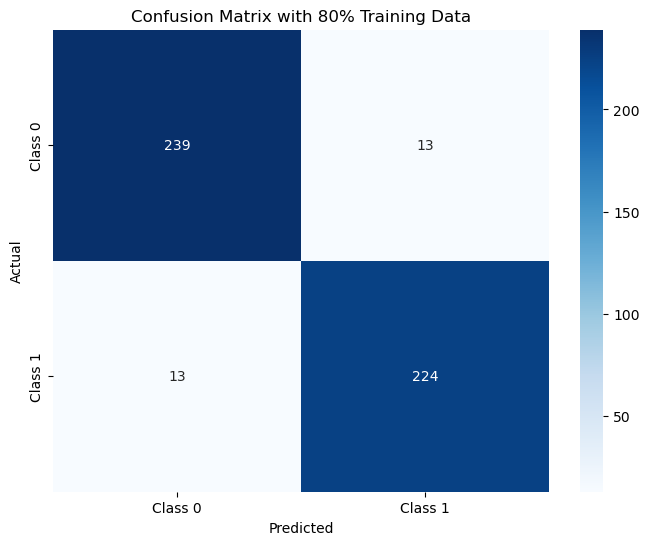

222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Validation Accuracy with 100% training data: 0.95
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       252
           1       0.95      0.95      0.95       237

    accuracy                           0.95       489
   macro avg       0.95      0.95      0.95       489
weighted avg       0.95      0.95      0.95       489



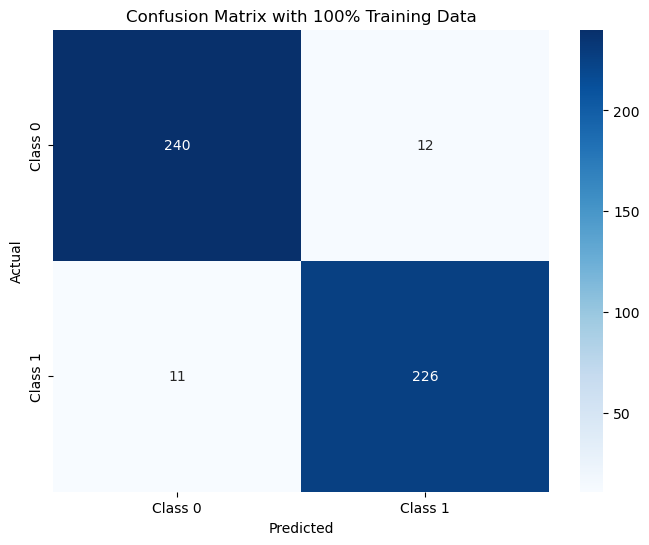

In [14]:
#Random forest classifier model
proportions = [0.2, 0.4, 0.6, 0.8, 1.0]
validation_accuracies = []
best_accuracy = 0
best_proportion = 0

for proportion in proportions:
    num_samples = int(len(train_data) * proportion)
    
    # Select training data
    X_train_emoticons = train_emoticons[:num_samples]
    y_train = train_labels[:num_samples]

    # Tokenize and pad the training data
    train_sequences = tokenizer.texts_to_sequences(X_train_emoticons)
    train_padded_sequences = pad_sequences(train_sequences, maxlen=max_length, padding='post')

    # Train the LSTM model on the current training subset
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(train_padded_sequences, y_train, epochs=20, batch_size=32, verbose=0)  # Set verbose=0 to suppress output

    # Extract features for the training subset
    train_features = model.predict(train_padded_sequences)
    val_features = model.predict(val_padded_sequences)

    # Convert features to DataFrames
    train_features_df = pd.DataFrame(train_features, columns=[f'feature_{i}' for i in range(train_features.shape[1])])
    val_features_df = pd.DataFrame(val_features, columns=[f'feature_{i}' for i in range(val_features.shape[1])])

    # Add features to the original DataFrames
    train_df_with_features = pd.concat([train_data[:num_samples].reset_index(drop=True), train_features_df], axis=1)
    val_df_with_features = pd.concat([val_data.reset_index(drop=True), val_features_df], axis=1)

    # Select features and labels for Random Forest
    X_train = train_df_with_features.iloc[:, -train_features_df.shape[1]:]  # Select last n columns for features
    y_train = train_df_with_features['label']

    # Train Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Predict labels on the validation set
    val_predictions = rf_classifier.predict(val_features_df)

    # Evaluate the model
    accuracy = accuracy_score(val_labels, val_predictions)
    validation_accuracies.append(accuracy)

    # Print results
    print(f'Validation Accuracy with {int(proportion * 100)}% training data: {accuracy:.2f}')
    print(classification_report(val_labels, val_predictions))
    
    # Checking for the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_proportion = proportion


    # Confusion matrix
    confusion_mat = confusion_matrix(val_labels, val_predictions)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix with {int(proportion * 100)}% Training Data')
    plt.show()


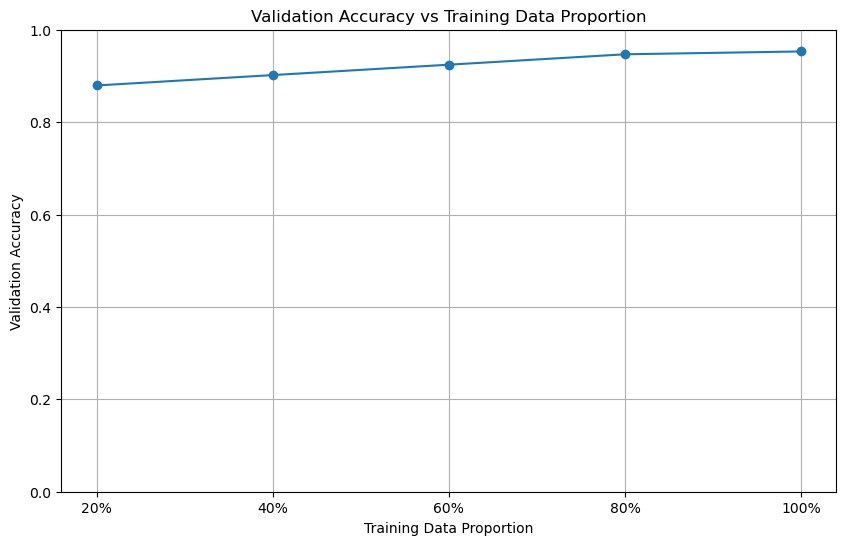

In [15]:
# Ploting validation accuracy for different proportions
plt.figure(figsize=(10, 6))
plt.plot([f'{int(p * 100)}%' for p in proportions], validation_accuracies, marker='o')
plt.title('Validation Accuracy vs Training Data Proportion')
plt.xlabel('Training Data Proportion')
plt.ylabel('Validation Accuracy')
plt.ylim(0, 1)
plt.grid()
plt.show()


In [16]:
print(f'Best proportion: {best_proportion}, with validation accuracy: {best_accuracy:.2f}')

Best proportion: 1.0, with validation accuracy: 0.95


In [17]:
#training RF classifier on the best proprtion
num_samples_best = int(len(train_data) * best_proportion)
X_train_best = train_features_df.iloc[:num_samples_best]  # Select all columns for features
y_train_best = train_labels[:num_samples_best]

rf_classifier_best = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_best.fit(X_train_best, y_train_best)

RandomForestClassifier(random_state=42)

In [19]:
test_data = pd.read_csv('datasets/test/test_emoticon.csv')  # Test dataset
test_emoticons = test_data['input_emoticon'].values

# Tokenize and pad the test sequences
test_sequences = tokenizer.texts_to_sequences(test_emoticons)
test_padded_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')

# Extract features from the test dataset using the trained LSTM model
test_features = model.predict(test_padded_sequences)

# Convert features to DataFrame
test_features_df = pd.DataFrame(test_features, columns=[f'feature_{i}' for i in range(test_features.shape[1])])

test_predictions = rf_classifier_best.predict(test_features_df)

# Adding predictions to the test DataFrame
test_data['predicted_label'] = test_predictions

# Saving predictions to a CSV file
test_data.to_csv('pred_emoticon.txt', index=False)

# Displaying the predictions
print(test_data[['input_emoticon', 'predicted_label']].head())

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
  input_emoticon  predicted_label
0  🛐😣😑🙯🚼🛗🛚😛🙼🙯🙍😑😣                1
1  😣🙵🛐😞😛🙯🚼😑🙼😣🙨😑🙯                1
2  🛜🙯😛🚼😣🙵😑🛐🙯😑🙭🙼😣                0
3  😪😣😑😛🙯🛐🚔🚼🙯😑🛠🙼😣                0
4  🚳🛐🙝😛😑🙯😣🚼🙯🙍😣🙼😑                1


In [22]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding_1 (Embedding)              │ (None, 13, 8)               │           1,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │           5,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,541 (88.05 KB)

 Trainable params: 7,513 (29.35 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,028 (58.71 KB)